# Linear Regression - FBI:UCR Crime dataset

#### Build a regression model to predict property crimes.

In [74]:
# Import modules.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from IPython.display import display
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.float_format = '{:.3f}'.format

# Suppress error.
import warnings
warnings.filterwarnings(action='ignore', module='scipy',
                       message='^internal gelsd')

In [75]:
# Load data.
df = pd.read_csv('~/src/data/unit2/nycrimedata.csv')
print(df.shape)
print(df.dtypes)
df.head()

(348, 13)
City                                       object
Population                                  int64
Violent\ncrime                              int64
Murder and\nnonnegligent\nmanslaughter      int64
Rape\n(revised\ndefinition)1              float64
Rape\n(legacy\ndefinition)2                 int64
Robbery                                     int64
Aggravated\nassault                         int64
Property\ncrime                             int64
Burglary                                    int64
Larceny-\ntheft                             int64
Motor\nvehicle\ntheft                       int64
Arson3                                    float64
dtype: object


,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [76]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


### Cleaning the data

In [77]:
df.columns = ['city', 'population', 'violent_crime', 'murder', 'rape_1',
              'rape_2', 'robbery', 'aggravated_assault', 'property_crime',
              'burglary', 'larceny_theft', 'motor_vehicle_theft', 'arson3']
df.tail()

,city,population,violent_crime,murder,rape_1,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
343,Woodbury Town,10685,3,0,nan,0,2,1,541,9,529,3,nan
344,Woodridge Village,829,7,0,nan,0,0,7,17,8,9,0,0.000
345,Woodstock Town,5931,2,0,nan,0,0,2,58,13,45,0,nan
346,Yonkers,199134,1036,6,nan,25,390,615,2368,470,1662,236,10.000
347,Yorktown Town,36643,15,0,nan,0,2,13,334,45,287,2,nan


In [78]:
df.isnull().sum()

city                     0
population               0
violent_crime            0
murder                   0
rape_1                 348
rape_2                   0
robbery                  0
aggravated_assault       0
property_crime           0
burglary                 0
larceny_theft            0
motor_vehicle_theft      0
arson3                 161
dtype: int64

In [79]:
df = df.drop(['rape_1'], axis=1)
df.tail()

,city,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3
343,Woodbury Town,10685,3,0,0,2,1,541,9,529,3,nan
344,Woodridge Village,829,7,0,0,0,7,17,8,9,0,0.000
345,Woodstock Town,5931,2,0,0,0,2,58,13,45,0,nan
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236,10.000
347,Yorktown Town,36643,15,0,0,2,13,334,45,287,2,nan


In [80]:
df.fillna(0, inplace=True)
df.isnull().sum()
#df.tail()

city                   0
population             0
violent_crime          0
murder                 0
rape_2                 0
robbery                0
aggravated_assault     0
property_crime         0
burglary               0
larceny_theft          0
motor_vehicle_theft    0
arson3                 0
dtype: int64

### Exploring the dataset

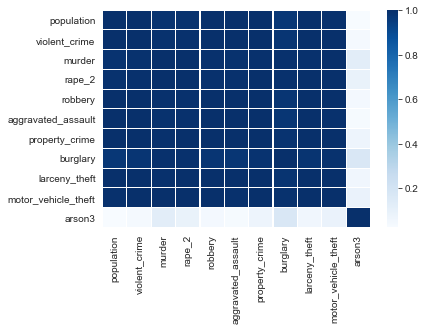

In [81]:
sns.heatmap(df.corr(), linewidths=.1, cmap='Blues')

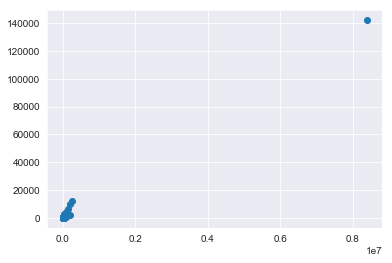

In [82]:
plt.scatter(x='population', y='property_crime', data=df)

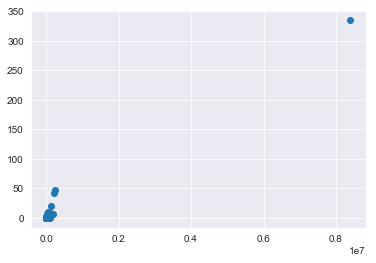

In [83]:
plt.scatter(x='population', y='murder', data=df)

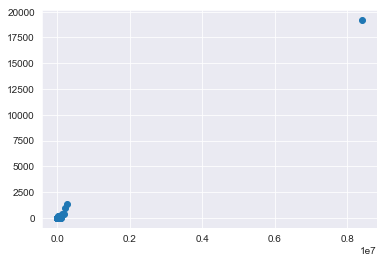

In [84]:
plt.scatter(x='population', y='robbery', data=df)

Note the outlier.

### Creating categorical features

In [85]:
df['population_squared'] = df['population']*df['population']
df.head()

,city,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,population_squared
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000,3463321
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000,6640929
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000,8099716
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0.000,9595377936
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0.000,40806544


In [86]:
df['violent_crime_cat'] = df['violent_crime'].apply(lambda x: 1 if x > 0 else 0)
df['murder_cat'] = df['murder'].apply(lambda x: 1 if x > 0 else 0)
df['robbery_cat'] = df['robbery'].apply(lambda x: 1 if x > 0 else 0)
df['burglary_cat'] = df['burglary'].apply(lambda x: 1 if x > 0 else 0)
df['larceny_cat'] = df['larceny_theft'].apply(lambda x: 1 if x > 0 else 0)

df.head()

,city,population,violent_crime,murder,rape_2,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson3,population_squared,violent_crime_cat,murder_cat,robbery_cat,burglary_cat,larceny_cat
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0.000,3463321,0,0,0,1,1
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0.000,6640929,1,0,0,1,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0.000,8099716,1,0,0,1,1
3,Albany,97956,791,8,30,227,526,4090,705,3243,142,0.000,9595377936,1,1,1,1,1
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0.000,40806544,1,0,1,1,1


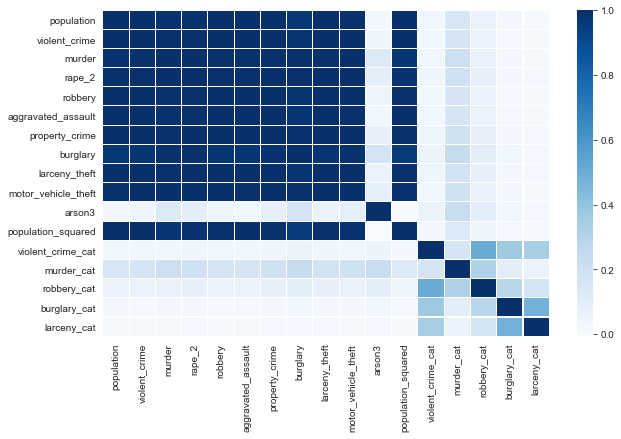

In [87]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), linewidths=.1, cmap='Blues')
plt.show()

### Regression

In [88]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime'].values.reshape(-1, 1)
X = df[['population_squared', 'murder_cat', 'robbery_cat']]
regr.fit(X, Y)

# Inspect the results.
print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared \n', regr.score(X, Y))

Coefficients 
 [[1.99256120e-09 1.18406016e+03 3.00052598e+02]]
Intercept 
 [40.08610471]
R-squared 
 0.9859871204030131


In [89]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime'].values.reshape(-1, 1)
X = df[['population_squared', 'murder_cat', 'robbery_cat', 'burglary_cat',
        'larceny_cat']]
regr.fit(X, Y)

# Inspect the results.
print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared \n', regr.score(X, Y))

Coefficients 
 [[1.99256336e-09 1.18353466e+03 2.92705887e+02 5.27696216e+01
  2.43491725e+00]]
Intercept 
 [-7.39928063]
R-squared 
 0.9859896629045115


In [90]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['property_crime'].values.reshape(-1, 1)
X = df[['population_squared', 'violent_crime_cat', 'burglary_cat',
        'larceny_cat']]
regr.fit(X, Y)

# Inspect the results.
print('Coefficients \n', regr.coef_)
print('Intercept \n', regr.intercept_)
print('R-squared \n', regr.score(X, Y))

Coefficients 
 [[ 2.00879725e-09  3.87735224e+02  2.20583541e+02 -1.25431718e+02]]
Intercept 
 [-31.56945955]
R-squared 
 0.9825562029801868
